In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'
dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')

dfratclean = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

In [2]:
df = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])
df['subU'] = df['speed'] - df['U'] 
df['subUM'] = df['speed'] - df['UM'] 

In [3]:
dfSRB7 = pd.DataFrame()
dd7 = df[df['session_id']==7]

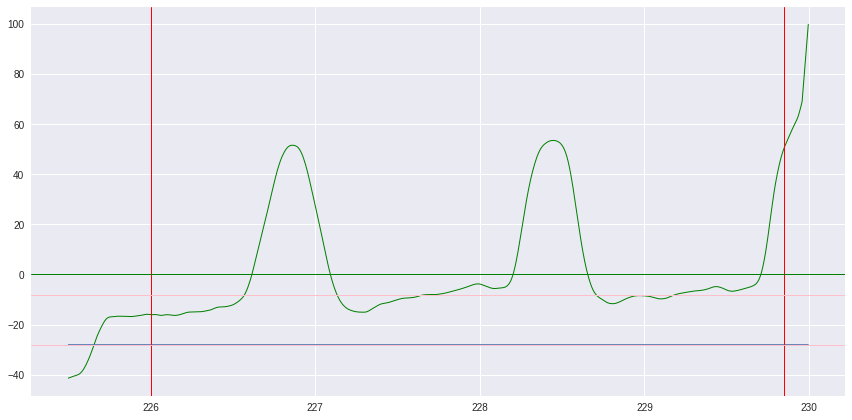

In [4]:
# 225, 230
dpart = dd7[(dd7['Time']>225.5) & (dd7['Time']<230)]
xmin, xmax = 226, 229.85

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-28, alpha=1, linewidth=1, color='pink');


In [5]:
dfV = dpart.copy()
dfV['SRB'] = dfV['U'] < -8

In [6]:
dfV.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,...,clockwise,theta,U,UM,MotiveExpTimeSecs,visible,speed,subU,subUM,SRB
711383,54120,225.500014,-0.075602,0.092676,-0.018167,-0.985828,-0.131924,0.055563,7,0.004166,...,-1,0.003006,-41.337379,-41.337815,218.966667,1,-28.0,13.337379,13.337815,True
711384,54121,225.504181,-0.075579,0.092755,-0.018292,-0.986250,-0.130399,0.052616,7,0.004167,...,-1,0.003003,-41.296874,-41.234645,218.966667,1,-28.0,13.296874,13.234645,True
711385,54122,225.508348,-0.075556,0.092834,-0.018417,-0.986665,-0.128878,0.049676,7,0.004167,...,-1,0.002994,-41.162648,-41.134021,218.966667,1,-28.0,13.162648,13.134021,True
711386,54123,225.512514,-0.075533,0.092911,-0.018540,-0.987071,-0.127363,0.046746,7,0.004166,...,-1,0.002982,-41.011905,-41.023041,218.966667,1,-28.0,13.011905,13.023041,True
711387,54124,225.516681,-0.075511,0.092988,-0.018663,-0.987466,-0.125879,0.043828,7,0.004167,...,-1,0.002968,-40.812199,-40.914105,218.966667,1,-28.0,12.812199,12.914105,True


In [7]:
print(len(dfV[dfV['SRB']==True]))
print(len(dpart))

516
1080


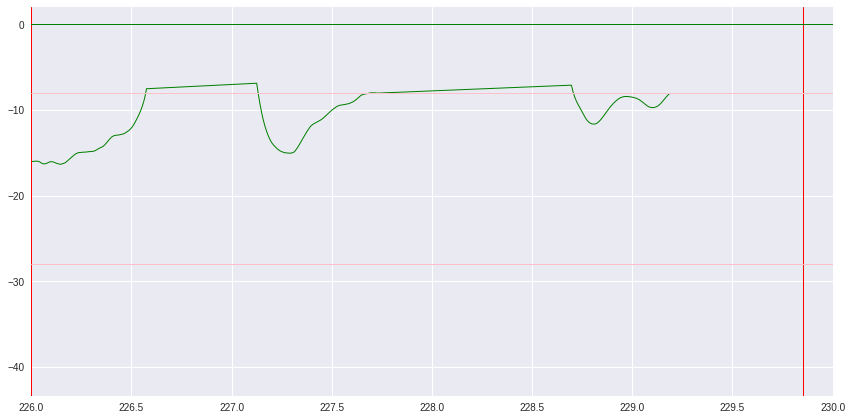

In [8]:
# 225, 230
g = sns.FacetGrid(data=dfV[dfV['SRB']==True], size=6, aspect=2, xlim=[226,230])
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
# g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g.map(plt.axhline, y=-8, alpha=1, linewidth=1, color='pink');
g.map(plt.axhline, y=-28, alpha=1, linewidth=1, color='pink');


In [19]:
dfSRB = dfV[dfV['SRB']==True]
dfSRB['dtime'] = dfSRB['Time'].diff(1)

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


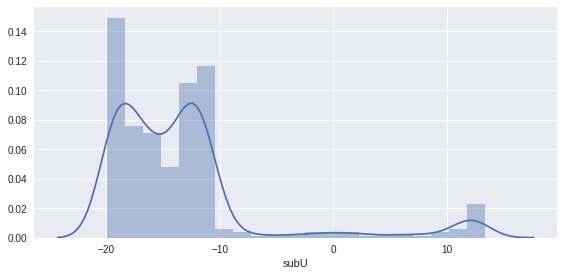

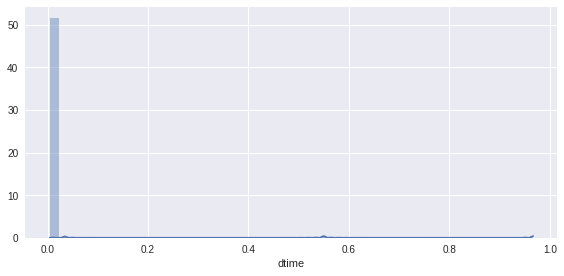

In [26]:
g = sns.FacetGrid(data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'subU');
g = sns.FacetGrid(data=dfSRB, size=4, aspect=2)
g.map(sns.distplot, 'dtime');

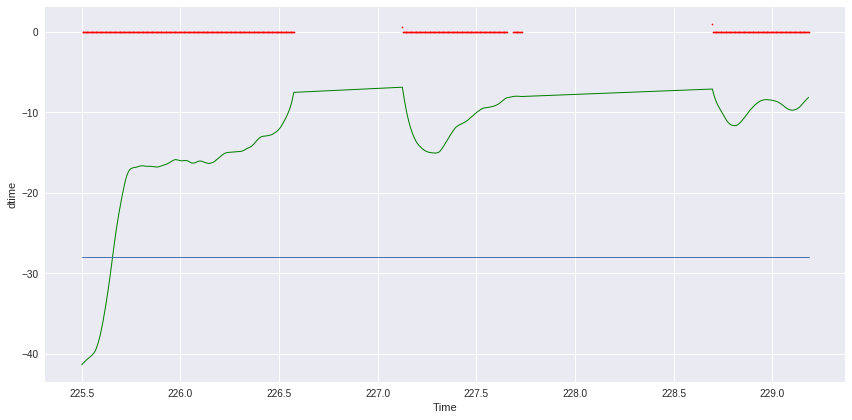

In [25]:
g = sns.FacetGrid(data=dfSRB, size=6, aspect=2)
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.scatter, "Time", "dtime" , alpha=1, linewidth=1, color='red', s=0.5);


In [39]:
df = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
df['color'] = np.where(df['Set']=='Z', 'green', 'red')
print(df)

conditions = [
    (df['Set'] == 'Z') & (df['Type'] == 'A'),
    (df['Set'] == 'Z') & (df['Type'] == 'B'),
    (df['Type'] == 'B')]
choices = ['yellow', 'blue', 'purple']
df['color'] = np.select(conditions, choices, default='black')
print(df)

  Set Type  color
0   Z    A  green
1   Z    B  green
2   X    B    red
3   Y    C    red
  Set Type   color
0   Z    A  yellow
1   Z    B    blue
2   X    B  purple
3   Y    C   black


In [45]:
# dfSRB['retract'] = dfSRB[dfSRB['dtime']>0.5]
# dfSRB['retract'] = np.select(dfSRB['dtime']>0.5, 'True', default='False')
dfSRB['retract'] = np.where(dfSRB['dtime']>0.5, True, False)
dfSRB[dfSRB['retract']==True ]

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,...,U,UM,MotiveExpTimeSecs,visible,speed,subU,subUM,SRB,dtime,retract
711773,54510,227.125014,-0.070379,0.102093,-0.031747,-0.997785,0.050188,-0.036228,7,0.004166,...,-8.092803,-6.874594,218.966667,1,-28.0,-19.907197,-21.125406,True,0.550000,True
712150,54887,228.695848,-0.073097,0.096974,-0.028990,-0.980203,-0.182151,0.074861,7,0.004167,...,-8.029581,-7.101879,218.966667,1,-28.0,-19.970419,-20.898121,True,0.966667,True
